In [9]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [10]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tensorflow Notes/datasets/Salary_dataset.csv')

In [11]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [13]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [14]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [15]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [20]:
df.shape

(30, 2)

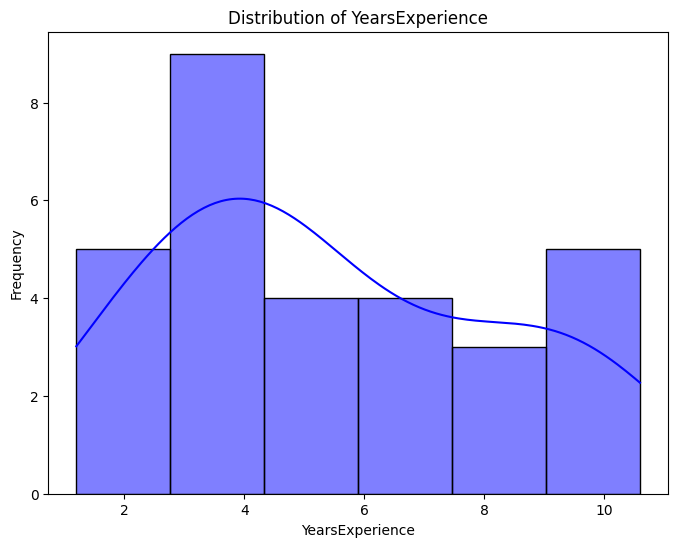

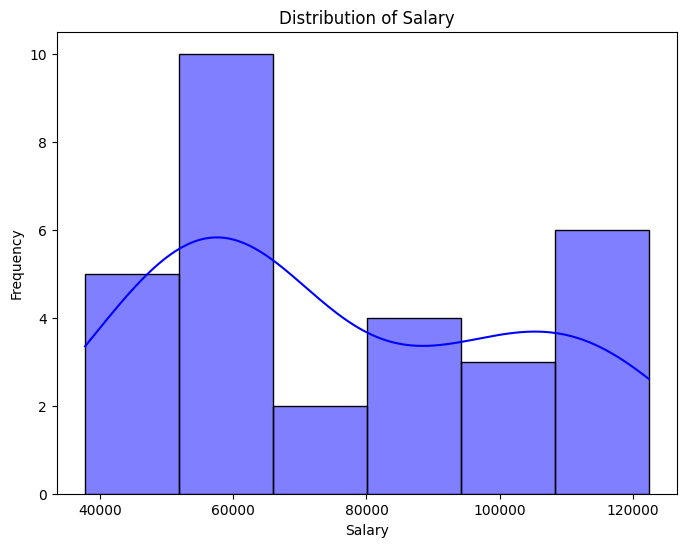

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_charts(df):
  # Numeric features
  numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
  for feature in numeric_features:
      plt.figure(figsize=(8, 6))
      sns.histplot(df[feature], kde=True, color='blue')
      plt.title(f'Distribution of {feature}')
      plt.xlabel(feature)
      plt.ylabel('Frequency')
      plt.show()

plot_charts(df)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [18]:
X = df_scaled.drop("Salary", axis=1)
y = df_scaled["Salary"]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [22]:
X_val

,YearsExperience
15,-0.148138
16,-0.076458
8,-0.757416
24,1.213777
17,-0.004779
28,1.787215


In [23]:
y_val

15   -0.299217
16   -0.370043
8    -0.428810
24    1.240203
17    0.262859
28    1.721028
Name: Salary, dtype: float64

In [21]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model = tf.keras.Sequential(name="Model_1")
model.add(tf.keras.Input(shape=(1,)))  # The input layer
model.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model.add(tf.keras.layers.Dense(1, activation=None))  # The output layer

# Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 605ms/step - loss: 0.9092 - mae: 0.9092
Epoch 2/200
1/1 [==============================] - 0s 15ms/step - loss: 0.8970 - mae: 0.8970
Epoch 3/200
1/1 [==============================] - 0s 15ms/step - loss: 0.8848 - mae: 0.8848
Epoch 4/200
1/1 [==============================] - 0s 11ms/step - loss: 0.8726 - mae: 0.8726
Epoch 5/200
1/1 [==============================] - 0s 11ms/step - loss: 0.8605 - mae: 0.8605
Epoch 6/200
1/1 [==============================] - 0s 12ms/step - loss: 0.8485 - mae: 0.8485
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 0.8365 - mae: 0.8365
Epoch 8/200
1/1 [==============================] - 0s 11ms/step - loss: 0.8247 - mae: 0.8247
Epoch 9/200
1/1 [==============================] - 0s 16ms/step - loss: 0.8129 - mae: 0.8129
Epoch 10/200
1/1 [==============================] - 0s 14ms/step - loss: 0.8011 - mae: 0.8011
Epoch 11/200
1/1 [==============================] - 0s 12ms/step - l

In [27]:
model.evaluate(X_val, y_val)

1/1 [==============================] - 1s 772ms/step - loss: 0.1803 - mae: 0.1803


[0.18029190599918365, 0.18029190599918365]

In [28]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 71ms/step - loss: 0.1763 - mae: 0.1763


[0.17630302906036377, 0.17630302906036377]

In [25]:
model.predict([1.787215])

1/1 [==============================] - 0s 104ms/step


array([[1.651423]], dtype=float32)

In [26]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model2 = tf.keras.Sequential(name="Model_2")
model2.add(tf.keras.Input(shape=(1,)))  # The input layer
model2.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model2.add(tf.keras.layers.Dense(1, activation=None))  # The output layer

# Compile the model
model2.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model2.fit(X_train, y_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 856ms/step - loss: 0.8697 - mae: 0.8697
Epoch 2/200
1/1 [==============================] - 0s 13ms/step - loss: 0.8455 - mae: 0.8455
Epoch 3/200
1/1 [==============================] - 0s 17ms/step - loss: 0.8216 - mae: 0.8216
Epoch 4/200
1/1 [==============================] - 0s 13ms/step - loss: 0.7978 - mae: 0.7978
Epoch 5/200
1/1 [==============================] - 0s 15ms/step - loss: 0.7742 - mae: 0.7742
Epoch 6/200
1/1 [==============================] - 0s 13ms/step - loss: 0.7508 - mae: 0.7508
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 0.7277 - mae: 0.7277
Epoch 8/200
1/1 [==============================] - 0s 11ms/step - loss: 0.7048 - mae: 0.7048
Epoch 9/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6820 - mae: 0.6820
Epoch 10/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6593 - mae: 0.6593
Epoch 11/200
1/1 [==============================] - 0s 12ms/step - l

In [29]:
model2.evaluate(X_val, y_val)

1/1 [==============================] - 0s 127ms/step - loss: 0.1867 - mae: 0.1867


[0.18672651052474976, 0.18672651052474976]

In [30]:
model2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 36ms/step - loss: 0.1724 - mae: 0.1724


[0.17243647575378418, 0.17243647575378418]

In [31]:
model2.predict([1.787215])

1/1 [==============================] - 0s 136ms/step


array([[1.6386526]], dtype=float32)

In [36]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model3 = tf.keras.Sequential(name="Model_3")
model3.add(tf.keras.Input(shape=(1,)))  # The input layer
model3.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model3.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model3.add(tf.keras.layers.Dense(1, activation=None))  # The output layer

# Compile the model
model3.compile(loss="mse",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mse"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model3.fit(X_train, y_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 802ms/step - loss: 0.9230 - mse: 0.9230
Epoch 2/200
1/1 [==============================] - 0s 11ms/step - loss: 0.7473 - mse: 0.7473
Epoch 3/200
1/1 [==============================] - 0s 13ms/step - loss: 0.5985 - mse: 0.5985
Epoch 4/200
1/1 [==============================] - 0s 14ms/step - loss: 0.4740 - mse: 0.4740
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 0.3688 - mse: 0.3688
Epoch 6/200
1/1 [==============================] - 0s 12ms/step - loss: 0.2824 - mse: 0.2824
Epoch 7/200
1/1 [==============================] - 0s 14ms/step - loss: 0.2101 - mse: 0.2101
Epoch 8/200
1/1 [==============================] - 0s 13ms/step - loss: 0.1511 - mse: 0.1511
Epoch 9/200
1/1 [==============================] - 0s 13ms/step - loss: 0.1046 - mse: 0.1046
Epoch 10/200
1/1 [==============================] - 0s 12ms/step - loss: 0.0699 - mse: 0.0699
Epoch 11/200
1/1 [==============================] - 0s 15ms/step - l

In [37]:
model3.evaluate(X_val, y_val)

1/1 [==============================] - 0s 130ms/step - loss: 0.0574 - mse: 0.0574


[0.05744728818535805, 0.05744728818535805]

In [38]:
model3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.0416 - mse: 0.0416


[0.04164824262261391, 0.04164824262261391]

In [39]:
model3.predict([1.787215])

1/1 [==============================] - 0s 77ms/step


array([[1.6266121]], dtype=float32)

In [50]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model4 = tf.keras.Sequential(name="Model_4")
model4.add(tf.keras.Input(shape=(1,)))  # The input layer
model4.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model4.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model4.add(tf.keras.layers.Dense(1, activation=None))  # The output layer

# Compile the model
model4.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
history = model4.fit(X_train, y_train, epochs=400)

Epoch 1/400
1/1 [==============================] - 1s 799ms/step - loss: 0.8759 - mae: 0.8759
Epoch 2/400
1/1 [==============================] - 0s 14ms/step - loss: 0.8004 - mae: 0.8004
Epoch 3/400
1/1 [==============================] - 0s 14ms/step - loss: 0.7275 - mae: 0.7275
Epoch 4/400
1/1 [==============================] - 0s 13ms/step - loss: 0.6575 - mae: 0.6575
Epoch 5/400
1/1 [==============================] - 0s 11ms/step - loss: 0.5896 - mae: 0.5896
Epoch 6/400
1/1 [==============================] - 0s 11ms/step - loss: 0.5227 - mae: 0.5227
Epoch 7/400
1/1 [==============================] - 0s 12ms/step - loss: 0.4584 - mae: 0.4584
Epoch 8/400
1/1 [==============================] - 0s 12ms/step - loss: 0.3962 - mae: 0.3962
Epoch 9/400
1/1 [==============================] - 0s 13ms/step - loss: 0.3346 - mae: 0.3346
Epoch 10/400
1/1 [==============================] - 0s 16ms/step - loss: 0.2721 - mae: 0.2721
Epoch 11/400
1/1 [==============================] - 0s 13ms/step - l

In [51]:
model4.evaluate(X_val, y_val)

1/1 [==============================] - 0s 130ms/step - loss: 0.2090 - mae: 0.2090


[0.20898176729679108, 0.20898176729679108]

In [52]:
model4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 132ms/step - loss: 0.1447 - mae: 0.1447


[0.14465534687042236, 0.14465534687042236]

In [53]:
model4.predict([1.787215])

1/1 [==============================] - 0s 90ms/step


array([[1.6532286]], dtype=float32)

In [45]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model5 = tf.keras.Sequential(name="Model_5")
model5.add(tf.keras.Input(shape=(1,)))  # The input layer
model5.add(tf.keras.layers.Dense(100, activation='relu'))  # The hidden layer
model5.add(tf.keras.layers.Dense(1, activation=None))  # The output layer

# Compile the model
model5.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model5.fit(X_train, y_train, epochs=400)

Epoch 1/400
1/1 [==============================] - 1s 628ms/step - loss: 1.0299 - mae: 1.0299
Epoch 2/400
1/1 [==============================] - 0s 15ms/step - loss: 1.0143 - mae: 1.0143
Epoch 3/400
1/1 [==============================] - 0s 13ms/step - loss: 0.9990 - mae: 0.9990
Epoch 4/400
1/1 [==============================] - 0s 12ms/step - loss: 0.9837 - mae: 0.9837
Epoch 5/400
1/1 [==============================] - 0s 12ms/step - loss: 0.9685 - mae: 0.9685
Epoch 6/400
1/1 [==============================] - 0s 11ms/step - loss: 0.9535 - mae: 0.9535
Epoch 7/400
1/1 [==============================] - 0s 11ms/step - loss: 0.9387 - mae: 0.9387
Epoch 8/400
1/1 [==============================] - 0s 12ms/step - loss: 0.9240 - mae: 0.9240
Epoch 9/400
1/1 [==============================] - 0s 11ms/step - loss: 0.9095 - mae: 0.9095
Epoch 10/400
1/1 [==============================] - 0s 11ms/step - loss: 0.8951 - mae: 0.8951
Epoch 11/400
1/1 [==============================] - 0s 11ms/step - l

In [47]:
model5.evaluate(X_val, y_val)

1/1 [==============================] - 0s 170ms/step - loss: 0.1828 - mae: 0.1828


[0.18282254040241241, 0.18282254040241241]

In [48]:
model5.evaluate(X_test, y_test)

1/1 [==============================] - 0s 27ms/step - loss: 0.1740 - mae: 0.1740


[0.1740456074476242, 0.1740456074476242]

In [49]:
model5.predict([1.787215])

1/1 [==============================] - 0s 129ms/step


array([[1.6413231]], dtype=float32)

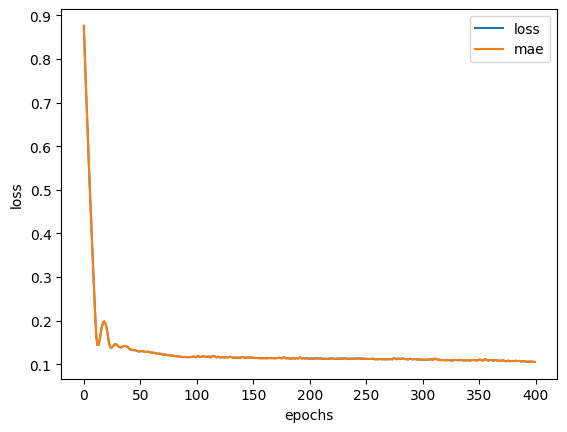

In [54]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

#EarlyStopping Callback

Tensorflow stops the callback when it doesn0t decrease the loss value.

In [55]:
import tensorflow as tf

# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    patience=10,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of monitored quantity
)

# Create the model with Sequential API using .add method
model4 = tf.keras.Sequential(name="Model_4")
model4.add(tf.keras.Input(shape=(1,)))  # The input layer
model4.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model4.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model4.add(tf.keras.layers.Dense(1, activation=None))  # The output layer

# Compile the model
model4.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

# Assuming X_train, y_train, X_val, y_val are your training and validation data
# Fit the model with EarlyStopping callback
history = model4.fit(X_train, y_train, epochs=400, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/400
1/1 [==============================] - 1s 1s/step - loss: 0.8874 - mae: 0.8874 - val_loss: 0.6499 - val_mae: 0.6499
Epoch 2/400
1/1 [==============================] - 0s 50ms/step - loss: 0.8090 - mae: 0.8090 - val_loss: 0.5945 - val_mae: 0.5945
Epoch 3/400
1/1 [==============================] - 0s 42ms/step - loss: 0.7336 - mae: 0.7336 - val_loss: 0.5415 - val_mae: 0.5415
Epoch 4/400
1/1 [==============================] - 0s 43ms/step - loss: 0.6610 - mae: 0.6610 - val_loss: 0.4892 - val_mae: 0.4892
Epoch 5/400
1/1 [==============================] - 0s 61ms/step - loss: 0.5902 - mae: 0.5902 - val_loss: 0.4370 - val_mae: 0.4370
Epoch 6/400
1/1 [==============================] - 0s 39ms/step - loss: 0.5196 - mae: 0.5196 - val_loss: 0.3864 - val_mae: 0.3864
Epoch 7/400
1/1 [==============================] - 0s 58ms/step - loss: 0.4507 - mae: 0.4507 - val_loss: 0.3473 - val_mae: 0.3473
Epoch 8/400
1/1 [==============================] - 0s 58ms/step - loss: 0.3833 - mae: 0.3833

In [56]:
model4.evaluate(X_val, y_val)

1/1 [==============================] - 0s 28ms/step - loss: 0.1603 - mae: 0.1603


[0.16027116775512695, 0.16027116775512695]

In [57]:
model4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 28ms/step - loss: 0.1706 - mae: 0.1706


[0.1705997735261917, 0.1705997735261917]

In [58]:
model4.predict([1.787215])

1/1 [==============================] - 0s 89ms/step


array([[1.7671773]], dtype=float32)